<a href="https://colab.research.google.com/github/daikichiba9511/study_log/blob/master/Bayesian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
alpha_0=51
beta_0=51

num_coins=100
num_iter=100

In [0]:
l_p=np.random.beta(a=alpha_0,b=beta_0,size=num_coins)

In [0]:
from scipy.stats import bernoulli

l_front=[bernoulli.rvs(p,size=num_iter).sum() for p in l_p]

In [9]:
np.std(l_front)

6.596969000988258

## ベイズ推定

### MCMC


In [13]:
import pymc3 as pm
import matplotlib.pyplot as plt
%matplotlib inline
#generateing model
with pm.Model() as model:
#   prior distribution of alpha and beta
#   alpha = pm.Uniform('alpha',lower=0,upper=1e+5)
#   beta = pm.Uniform('beta',lower=0,upper=1r+5)


        #prior distribution of mu and sd
    mu = pm.Beta('mu',alpha=10,beta=10)
    sd = pm.Uniform('sd',lower=0,upper=mu*(1-mu)/2)
    
    
#    #prior distribution of p determined by alpha and beta
#    #p=pm.Beta('p',alpha=alpha,beta=beta,shape=len(l_front))

        #prior ditribution of determinded by mu and sd
    p=pm.Beta('p',mu=mu,sd=sd,shape=len(l_front))
        
     #observable
    y = pm.Binomial('y',n=num_iter,p=p,observed=l_front)
    
#  sampling

with model:
    trace=pm.sample(1500,tune=100,chains=5,random_seed=57)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (5 chains in 1 job)
NUTS: [p, sd, mu]
100%|██████████| 1600/1600 [00:09<00:00, 163.54it/s]
The acceptance probability does not match the target. It is 0.9316940242706376, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9276431060932667, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9193375635014058, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9114907299562754, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9067841373081321, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 25% f

In [14]:
pm.find_MAP(model=model)

/usr/local/lib/python3.6/dist-packages/pymc3/tuning/starting.py:61: UserWarning: find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.
  warnings.warn('find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.')
logp = 1,258.8, ||grad|| = 2.0231e+07: 100%|██████████| 156/156 [00:00<00:00, 1485.50it/s] 


{'mu': array(0.52047795),
 'mu_logodds__': array(0.08195764),
 'p': array([0.52047794, 0.52047795, 0.52047795, 0.52047795, 0.52047795,
        0.52047795, 0.52047795, 0.52047795, 0.52047795, 0.52047794,
        0.52047795, 0.52047794, 0.52047795, 0.52047794, 0.52047793,
        0.52047795, 0.52047794, 0.52047795, 0.52047794, 0.52047793,
        0.52047795, 0.52047794, 0.52047794, 0.52047795, 0.52047795,
        0.52047795, 0.52047795, 0.52047795, 0.52047795, 0.52047794,
        0.52047795, 0.52047794, 0.52047795, 0.52047795, 0.52047795,
        0.52047795, 0.52047795, 0.52047795, 0.52047795, 0.52047795,
        0.52047796, 0.52047795, 0.52047794, 0.52047795, 0.52047794,
        0.52047795, 0.52047795, 0.52047794, 0.52047795, 0.52047795,
        0.52047795, 0.52047795, 0.52047795, 0.52047795, 0.52047795,
        0.52047795, 0.52047794, 0.52047796, 0.52047794, 0.52047795,
        0.52047795, 0.52047794, 0.52047795, 0.52047795, 0.52047795,
        0.52047795, 0.52047795, 0.52047795, 0.520

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9d14e36518>,
      dtype=object)

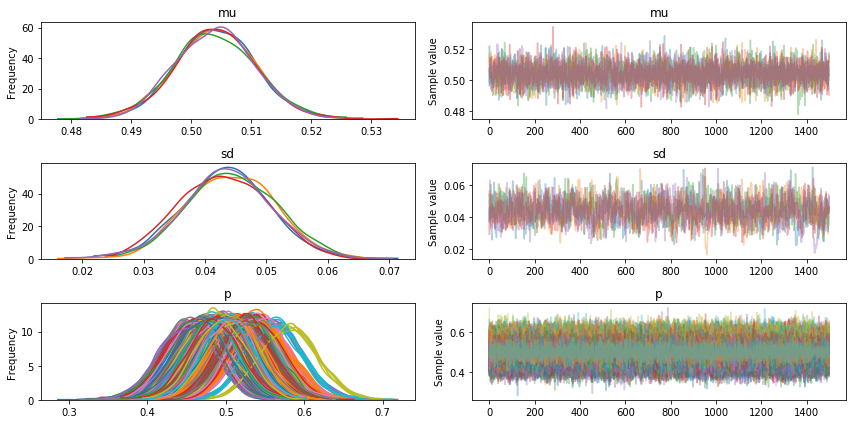

In [15]:
pm.traceplot(trace)